In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import re
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [94]:
data=pd.read_csv("/content/ApartmentRentPrediction.csv")



Check null values


In [95]:
data.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3185
bathrooms          30
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     3751
price               0
price_display       0
price_type          0
square_feet         0
address          2971
cityname           66
state              66
latitude            7
longitude           7
source              0
time                0
dtype: int64

check distribution if normal or not

In [96]:
columns_to_clean = ['bathrooms','bedrooms','latitude','longitude']


#Remove null values from specific columns
data = data.dropna(subset=columns_to_clean)

Text(0.5, 1.0, 'Histogram of column_name')

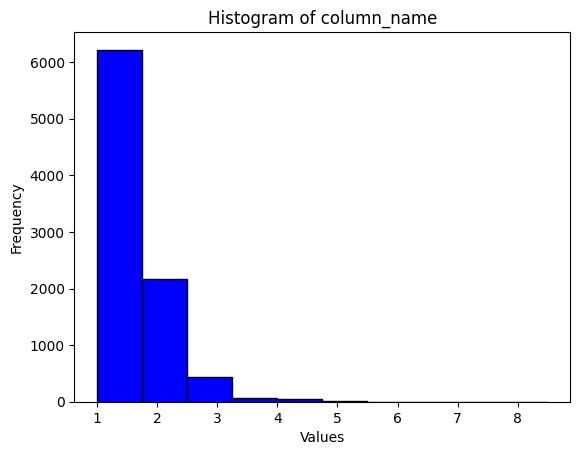

In [97]:
plt.hist(data['bathrooms'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')

In [98]:
data['bathrooms'] = np.where(data['bathrooms'] >=4, 3, data['bathrooms'])

Text(0.5, 1.0, 'Histogram of column_name')

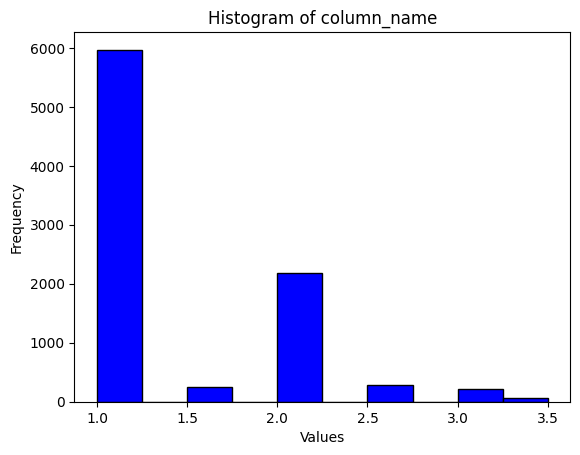

In [99]:
plt.hist(data['bathrooms'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')

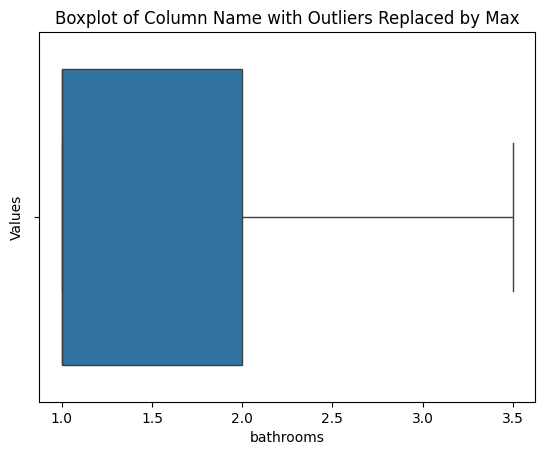

In [100]:
sns.boxplot(x='bathrooms', data=data)
plt.xlabel('bathrooms')
plt.ylabel('Values')
plt.title('Boxplot of Column Name with Outliers Replaced by Max')
plt.show()

In [101]:
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace=True)

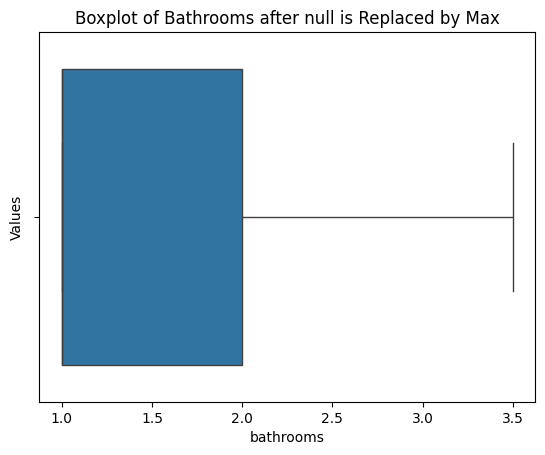

In [102]:
sns.boxplot(x='bathrooms', data=data)
plt.xlabel('bathrooms')
plt.ylabel('Values')
plt.title('Boxplot of Bathrooms after null is Replaced by Max')
plt.show()

## Bedrooms

Text(0.5, 1.0, 'Histogram of bedrooms')

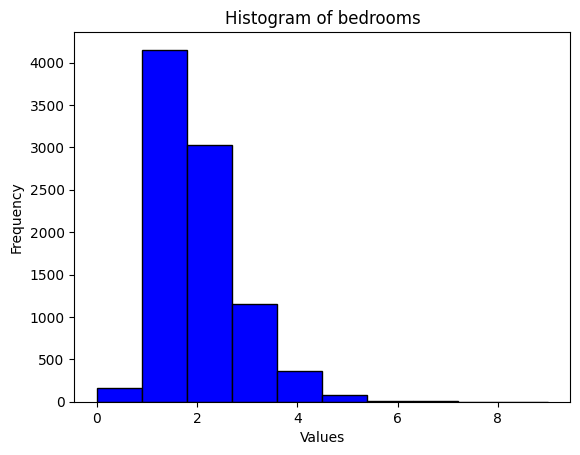

In [103]:
plt.hist(data['bedrooms'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of bedrooms')
#normal

In [104]:
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace=True)

Text(0.5, 1.0, 'Histogram of bedrooms after replace null with max value')

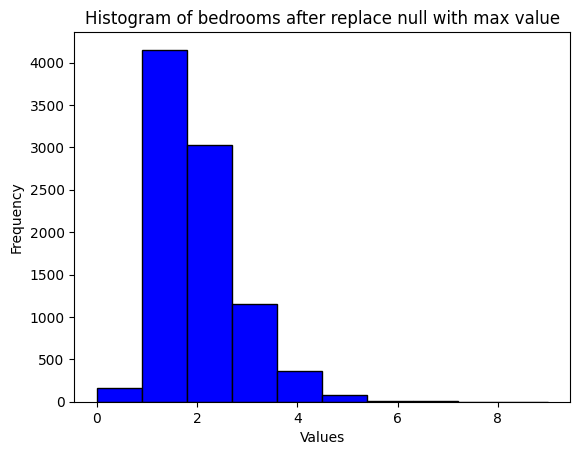

In [105]:
plt.hist(data['bedrooms'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of bedrooms after replace null with max value')

## Square_feet

Text(0.5, 1.0, 'Histogram of square_feet')

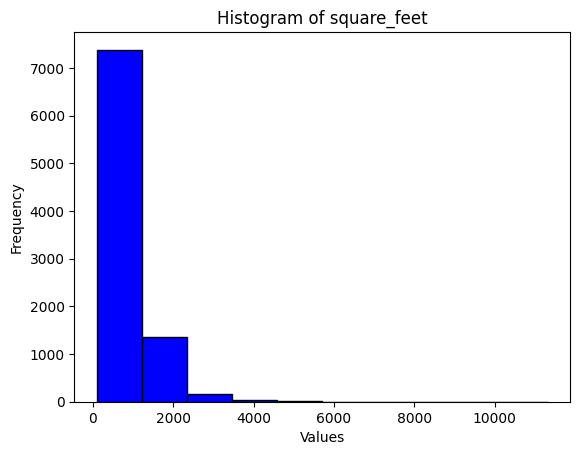

In [106]:
plt.hist(data['square_feet'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of square_feet')
# not normal

In [107]:
data['square_feet']=np.log(data['square_feet'])

Text(0.5, 1.0, 'Histogram of square_feet')

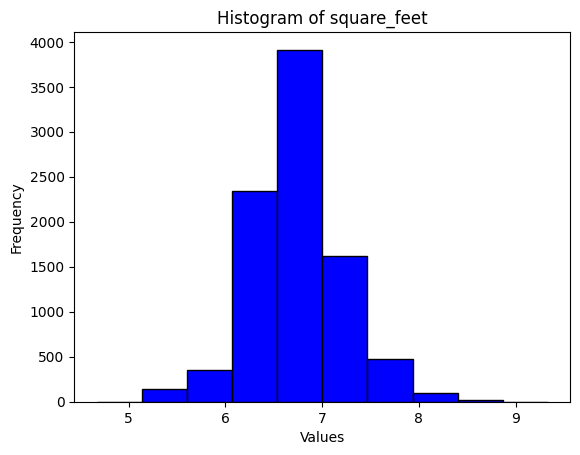

In [108]:
plt.hist(data['square_feet'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of square_feet')

Text(0.5, 1.0, 'Boxplot of sqaure_feet')

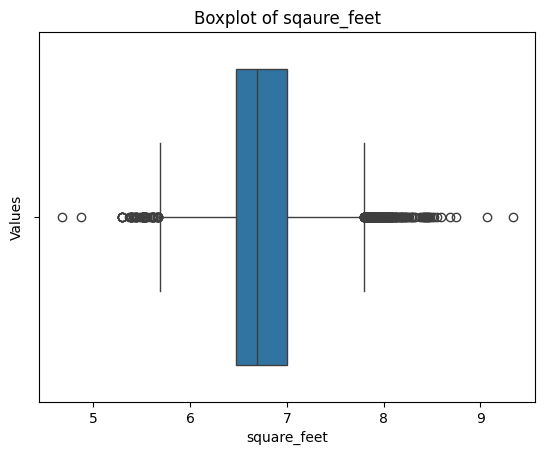

In [109]:
sns.boxplot(x='square_feet', data=data)

# Adding labels and title
plt.xlabel('square_feet')
plt.ylabel('Values')
plt.title('Boxplot of sqaure_feet')

In [110]:
data['square_feet'] = np.where(data['square_feet'] >=7.6, 7.7, data['square_feet'])
data['square_feet'] = np.where(data['square_feet'] <=5.7, 5.7, data['square_feet'])

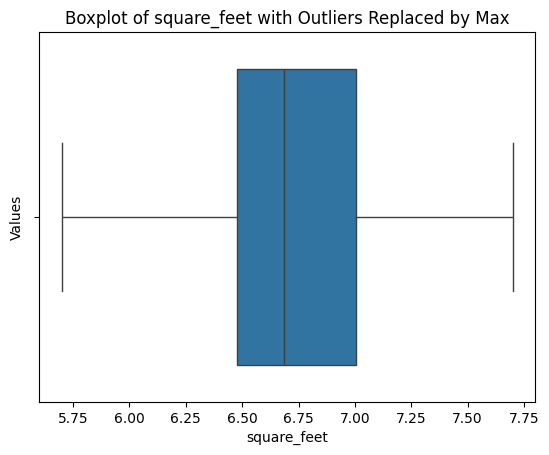

In [111]:
sns.boxplot(x='square_feet', data=data)
plt.xlabel('square_feet')
plt.ylabel('Values')
plt.title('Boxplot of square_feet with Outliers Replaced by Max')
plt.show()

Text(0.5, 1.0, 'Histogram of square_feet')

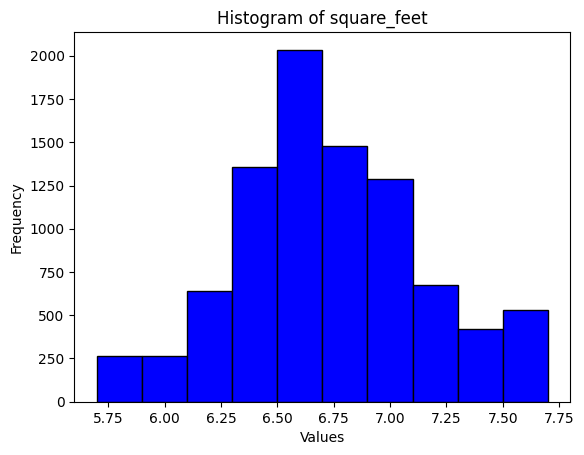

In [112]:
plt.hist(data['square_feet'], bins=10, color='blue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of square_feet')

## Longitude

Text(0.5, 1.0, 'Histogram of longitude')

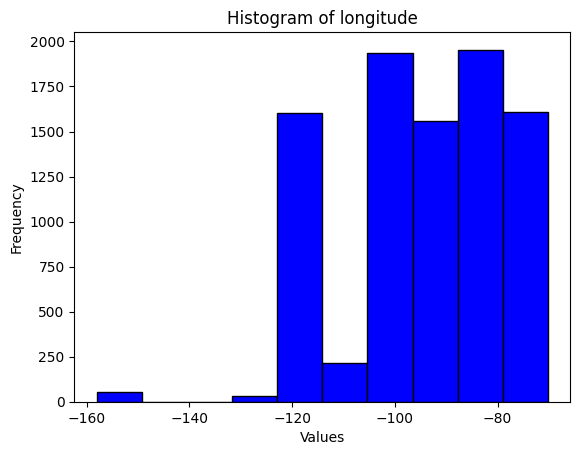

In [113]:
plt.hist(data['longitude'], bins=10, color='blue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of longitude')


In [114]:
data['longitude'] = np.where(data['longitude'] <=-122, -122, data['longitude'])

Text(0.5, 1.0, 'Histogram of longitude after replace null with max value')

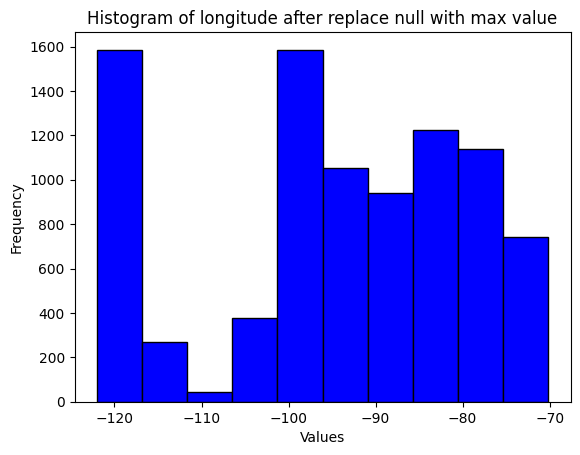

In [115]:
plt.hist(data['longitude'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of longitude after replace null with max value')

## Latitude

Text(0.5, 1.0, 'Histogram of latitude')

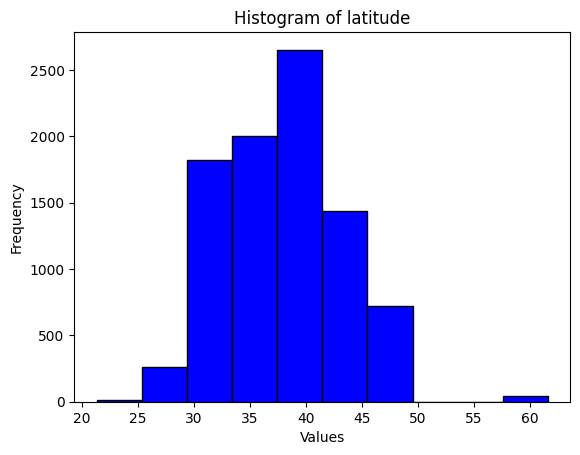

In [116]:
plt.hist(data['latitude'], bins=10, color='blue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of latitude')


In [117]:
data['latitude'] = np.where(data['latitude'] <=25, 25, data['latitude'])
data['latitude'] = np.where(data['latitude'] >=50, 50, data['latitude'])

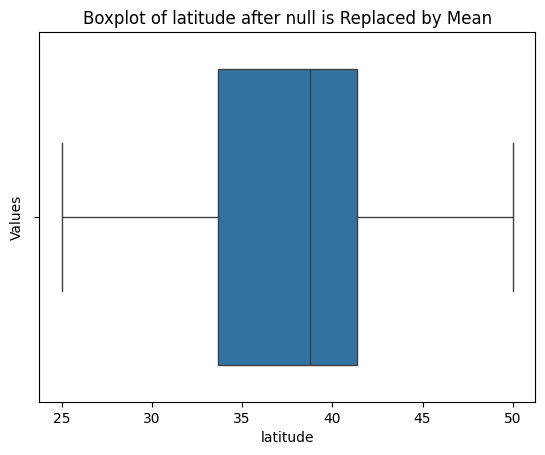

In [118]:
sns.boxplot(x='latitude', data=data)
plt.xlabel('latitude')
plt.ylabel('Values')
plt.title('Boxplot of latitude after null is Replaced by Mean')
plt.show()

In [119]:
data.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3150
bathrooms           0
bedrooms            0
currency            0
fee                 0
has_photo           0
pets_allowed     3723
price               0
price_display       0
price_type          0
square_feet         0
address          2953
cityname           59
state              59
latitude            0
longitude           0
source              0
time                0
dtype: int64

## String columns

In [120]:
object_columns = data.select_dtypes(include=['object']).columns
for col in object_columns:
    data[col] = data[col].str.lower()
    data[col] = data[col].fillna(data[col].mode)
data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5508832632,housing/rent/apartment,"two br - $1,194/mo - apartment - come and see ...","come experience. in cary, nc offering recently...","clubhouse,fireplace,gym,patio/deck,playground,...",2.5,2.0,usd,no,thumbnail,...,"$1,194",monthly,6.684612,<bound method Series.mode of 0 ...,cary,nc,35.7585,-78.7783,rentdigs.com,1568755960
1,5664576849,housing/rent/apartment,one br 640 west wilson street,this unit is located at 640 west wilson street...,"cable or satellite,dishwasher,elevator,garbage...",1.0,1.0,usd,no,thumbnail,...,"$1,370",monthly,6.678342,640 west wilson st,madison,wi,43.0724,-89.4003,rentlingo,1577015508
2,5668619365,housing/rent/apartment,one br 2777 sw archer rd,"this unit is located at 2777 sw archer rd, gai...","basketball,cable or satellite,dishwasher,inter...",1.0,1.0,usd,no,thumbnail,...,"$1,009",monthly,6.327937,2777 sw archer road,gainesville,fl,29.6533,-82.3656,rentlingo,1577358921
3,5668632604,housing/rent/apartment,one br 534-542 park avenue,"this unit is located at 534-542 park avenue, o...",<bound method Series.mode of 0 clubhouse...,1.0,1.0,usd,no,thumbnail,...,$695,monthly,6.396930,534-542 park ave,omaha,ne,41.2562,-96.0404,rentlingo,1577359849
4,5668637441,housing/rent/apartment,three br 2216 s palm grove ave,"this unit is located at 2216 s palm grove ave,...",<bound method Series.mode of 0 clubhouse...,3.0,3.0,usd,no,thumbnail,...,"$3,695",monthly,7.377759,2216 s palm grove avenue,los angeles,ca,34.0372,-118.2972,rentlingo,1577360159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,5509251724,housing/rent/apartment,prominence apartments two br luxury apartment ...,price from: 1158. your hunt for apartments to ...,"clubhouse,gym,patio/deck,pool",1.0,2.0,usd,no,thumbnail,...,"$1,158",monthly,6.774224,<bound method Series.mode of 0 ...,new london,ct,41.3498,-72.1062,rentdigs.com,1568781008
8996,5668612787,housing/rent/apartment,one br 10001 ne 1st st,"this unit is located at 10001 ne first st, bel...",<bound method Series.mode of 0 clubhouse...,1.0,1.0,usd,no,thumbnail,...,"$2,035",monthly,6.714171,10001 ne 1st st,bellevue,wa,47.5988,-122.0000,rentlingo,1577358501
8997,5668617853,housing/rent/apartment,two br 95 e 2nd st,"this unit is located at 95 e second st, fond d...","parking,storage",1.0,2.0,usd,no,thumbnail,...,$424,monthly,6.738152,95 e 2nd st,fond du lac,wi,43.7815,-88.4411,rentlingo,1577358818
8998,5509093066,housing/rent/apartment,pico rivera - superb apartment nearby fine din...,top rated by yelp and 5 yrs in a row! style an...,"ac,clubhouse,dishwasher,gated,gym,internet acc...",1.0,2.0,usd,no,thumbnail,...,"$1,417",monthly,6.192362,<bound method Series.mode of 0 ...,pico rivera,ca,33.9883,-118.0875,rentdigs.com,1568772954


In [121]:
data['total_numberofrooms']=data['bathrooms']+data['bedrooms']

In [122]:
data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,total_numberofrooms
0,5508832632,housing/rent/apartment,"two br - $1,194/mo - apartment - come and see ...","come experience. in cary, nc offering recently...","clubhouse,fireplace,gym,patio/deck,playground,...",2.5,2.0,usd,no,thumbnail,...,monthly,6.684612,<bound method Series.mode of 0 ...,cary,nc,35.7585,-78.7783,rentdigs.com,1568755960,4.5
1,5664576849,housing/rent/apartment,one br 640 west wilson street,this unit is located at 640 west wilson street...,"cable or satellite,dishwasher,elevator,garbage...",1.0,1.0,usd,no,thumbnail,...,monthly,6.678342,640 west wilson st,madison,wi,43.0724,-89.4003,rentlingo,1577015508,2.0
2,5668619365,housing/rent/apartment,one br 2777 sw archer rd,"this unit is located at 2777 sw archer rd, gai...","basketball,cable or satellite,dishwasher,inter...",1.0,1.0,usd,no,thumbnail,...,monthly,6.327937,2777 sw archer road,gainesville,fl,29.6533,-82.3656,rentlingo,1577358921,2.0
3,5668632604,housing/rent/apartment,one br 534-542 park avenue,"this unit is located at 534-542 park avenue, o...",<bound method Series.mode of 0 clubhouse...,1.0,1.0,usd,no,thumbnail,...,monthly,6.396930,534-542 park ave,omaha,ne,41.2562,-96.0404,rentlingo,1577359849,2.0
4,5668637441,housing/rent/apartment,three br 2216 s palm grove ave,"this unit is located at 2216 s palm grove ave,...",<bound method Series.mode of 0 clubhouse...,3.0,3.0,usd,no,thumbnail,...,monthly,7.377759,2216 s palm grove avenue,los angeles,ca,34.0372,-118.2972,rentlingo,1577360159,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,5509251724,housing/rent/apartment,prominence apartments two br luxury apartment ...,price from: 1158. your hunt for apartments to ...,"clubhouse,gym,patio/deck,pool",1.0,2.0,usd,no,thumbnail,...,monthly,6.774224,<bound method Series.mode of 0 ...,new london,ct,41.3498,-72.1062,rentdigs.com,1568781008,3.0
8996,5668612787,housing/rent/apartment,one br 10001 ne 1st st,"this unit is located at 10001 ne first st, bel...",<bound method Series.mode of 0 clubhouse...,1.0,1.0,usd,no,thumbnail,...,monthly,6.714171,10001 ne 1st st,bellevue,wa,47.5988,-122.0000,rentlingo,1577358501,2.0
8997,5668617853,housing/rent/apartment,two br 95 e 2nd st,"this unit is located at 95 e second st, fond d...","parking,storage",1.0,2.0,usd,no,thumbnail,...,monthly,6.738152,95 e 2nd st,fond du lac,wi,43.7815,-88.4411,rentlingo,1577358818,3.0
8998,5509093066,housing/rent/apartment,pico rivera - superb apartment nearby fine din...,top rated by yelp and 5 yrs in a row! style an...,"ac,clubhouse,dishwasher,gated,gym,internet acc...",1.0,2.0,usd,no,thumbnail,...,monthly,6.192362,<bound method Series.mode of 0 ...,pico rivera,ca,33.9883,-118.0875,rentdigs.com,1568772954,3.0


## Encoding

In [123]:
dummy_cols=['has_photo','pets_allowed','price_type','source']
data=pd.get_dummies(data,columns=dummy_cols,dtype=int)

In [124]:
columns_to_check = ['bathrooms','bedrooms','total_numberofrooms']
for col in columns_to_check:

    data[col] = data[col].apply(lambda x: int(x) if pd.notnull(x) else None)
    data[col].astype(int)

In [125]:
data['price_display'] = data['price_display'].apply(lambda x: re.sub(r'\D', '', x))
data['price_display'] = data['price_display'].astype(int)

In [126]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:

     label_encoders[col] = LabelEncoder()
     data[col] = label_encoders[col].fit_transform(data[col].astype(str))

In [127]:
columns_to_drop = ['price','currency'	,'fee','category']
data = data.drop(columns_to_drop, axis=1)

In [128]:
data

,id,title,body,amenities,bathrooms,bedrooms,price_display,square_feet,address,cityname,...,source_listanza,source_listedbuy,source_real estate agent,source_realrentals,source_rentbits,source_rentcafé,source_rentdigs.com,source_rentlingo,source_rentocular,source_tenantcloud
0,5508832632,6821,344,1273,2,2,1194,6.684612,5948,222,...,0,0,0,0,0,0,1,0,0,0
1,5664576849,3921,7112,813,1,1,1370,6.678342,4906,763,...,0,0,0,0,0,0,0,1,0,0
2,5668619365,2994,5068,463,1,1,1009,6.327937,2768,482,...,0,0,0,0,0,0,0,1,0,0
3,5668632604,3727,6678,0,1,1,695,6.396930,4452,982,...,0,0,0,0,0,0,0,1,0,0
4,5668637441,6235,4557,0,3,3,3695,7.377759,2228,747,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,5509251724,4965,1215,1359,1,2,1158,6.774224,5948,921,...,0,0,0,0,0,0,1,0,0,0
8996,5668612787,1762,2550,0,1,1,2035,6.714171,71,97,...,0,0,0,0,0,0,0,1,0,0
8997,5668617853,8069,7997,2019,1,2,424,6.738152,5850,451,...,0,0,0,0,0,0,0,1,0,0
8998,5509093066,4941,8571,200,1,2,1417,6.192362,5948,1042,...,0,0,0,0,0,0,1,0,0,0


In [129]:
colu= data.corr()

colu

,id,title,body,amenities,bathrooms,bedrooms,price_display,square_feet,address,cityname,...,source_listanza,source_listedbuy,source_real estate agent,source_realrentals,source_rentbits,source_rentcafé,source_rentdigs.com,source_rentlingo,source_rentocular,source_tenantcloud
id,1.000000,0.268713,0.484028,-0.260590,-0.072323,0.039645,-0.021621,-0.086901,-0.608121,0.016733,...,0.028249,0.059114,0.006785,0.046517,0.006690,0.004367,-0.986340,0.923432,0.025743,0.006736
title,0.268713,1.000000,0.286137,-0.164580,0.093467,0.132488,0.023998,0.077071,-0.041360,0.049786,...,0.033752,-0.176400,-0.013511,-0.039533,0.003823,0.007598,-0.264179,0.317522,0.045064,-0.016677
body,0.484028,0.286137,1.000000,-0.183172,-0.048785,0.015795,-0.027402,-0.103336,0.067315,-0.004022,...,-0.057458,-0.171915,-0.013150,-0.068621,-0.015453,-0.013894,-0.488276,0.551383,-0.046674,-0.018026
amenities,-0.260590,-0.164580,-0.183172,1.000000,-0.063340,-0.078861,-0.054616,-0.068595,0.151545,-0.043123,...,0.022151,0.083060,-0.006815,-0.062583,0.015487,-0.011470,0.252351,-0.267901,0.012879,0.015065
bathrooms,-0.072323,0.093467,-0.048785,-0.063340,1.000000,0.686801,0.349074,0.725199,0.035052,-0.000071,...,-0.000340,0.007176,-0.006658,-0.009276,-0.006658,-0.006658,0.067918,-0.065227,0.004789,-0.006658
bedrooms,0.039645,0.132488,0.015795,-0.078861,0.686801,1.000000,0.298674,0.712857,-0.058215,0.003722,...,0.025283,0.032617,0.002836,-0.052240,-0.008385,0.002836,-0.047185,0.041113,0.005195,0.014058
price_display,-0.021621,0.023998,-0.027402,-0.054616,0.349074,0.298674,1.000000,0.359234,-0.006676,0.050240,...,0.027189,-0.027872,-0.006678,0.028874,-0.003816,-0.004786,0.030057,-0.028773,0.029910,-0.007163
square_feet,-0.086901,0.077071,-0.103336,-0.068595,0.725199,0.712857,0.359234,1.000000,-0.004123,0.004486,...,0.033736,0.030737,0.000703,-0.012024,-0.004525,0.000957,0.080822,-0.090318,0.019453,0.005437
address,-0.608121,-0.041360,0.067315,0.151545,0.035052,-0.058215,-0.006676,-0.004123,1.000000,-0.013985,...,0.010764,0.048906,-0.004601,0.075435,0.006631,0.010232,0.601869,-0.610646,0.023896,0.006087
cityname,0.016733,0.049786,-0.004022,-0.043123,-0.000071,0.003722,0.050240,0.004486,-0.013985,1.000000,...,0.001071,0.018340,-0.005377,0.026780,0.009534,-0.008501,-0.017274,0.005109,0.013678,0.015025


In [130]:
specific_column = 'price_display'


correlation_with_specific_column = data.corrwith(data[specific_column])


columns_to_drop = correlation_with_specific_column[correlation_with_specific_column.abs() <= 0.1].index


data = data.drop(columns=columns_to_drop)



In [131]:
x=data.drop('price_display',axis=1)
y=data['price_display']
data=pd.DataFrame(x)
data

,bathrooms,bedrooms,square_feet,state,longitude,total_numberofrooms
0,2,2,6.684612,27,-78.7783,4
1,1,1,6.678342,48,-89.4003,2
2,1,1,6.327937,10,-82.3656,2
3,1,1,6.396930,29,-96.0404,2
4,3,3,7.377759,5,-118.2972,6
...,...,...,...,...,...,...
8995,1,2,6.774224,7,-72.1062,3
8996,1,1,6.714171,47,-122.0000,2
8997,1,2,6.738152,48,-88.4411,3
8998,1,2,6.192362,5,-118.0875,3


In [132]:
from scipy.stats import boxcox


y, _ = boxcox(y)


Text(0.5, 1.0, 'Histogram of latitude')

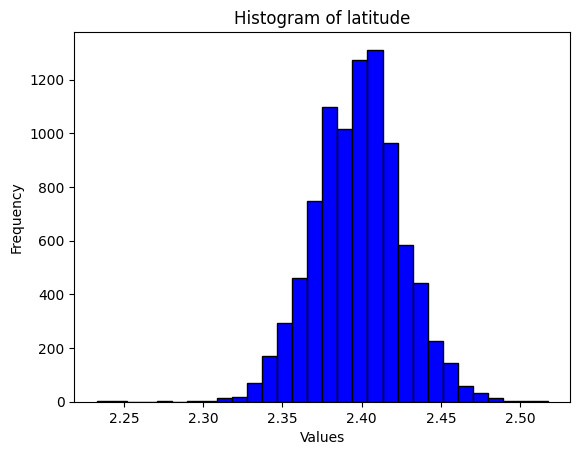

In [133]:
plt.hist(y, bins=30, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of latitude')
# exact normal

In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=scaler.transform(x)
print (x)

[[ -0.18674033  -1.57048454 -15.93503226  -1.76655701   6.27758256
   -1.76756142]
 [ -3.67411438  -2.69832244 -15.96893085  -1.67418462   6.23180014
   -2.83936694]
 [ -3.67411438  -2.69832244 -17.86350455  -1.84133466   6.26212075
   -2.83936694]
 ...
 [ -3.67411438  -1.57048454 -15.64554772  -1.67418462   6.23593443
   -2.30346418]
 [ -3.67411438  -1.57048454 -18.59652848  -1.86332809   6.10815398
   -2.30346418]
 [ -0.18674033  -1.57048454 -14.38297137  -1.86332809   6.10638294
   -1.76756142]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Model

In [140]:




X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)


rf_regressor = RandomForestRegressor(max_depth=6,n_estimators=50,max_features=3)

rf_regressor.fit(X_train, y_train)


y_train_pred = rf_regressor.predict(X_train)
y_val_pred = rf_regressor.predict(X_val)
y_test_pred = rf_regressor.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

cv_scores = cross_val_score(rf_regressor, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()

# Print results
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Validation):", mse_val)
print("Mean Squared Error (Test):", mse_test)

print("R-squared Score (Train):", r2_train)
print("R-squared Score (Validation):", r2_val)
print("R-squared Score (Test):", r2_test)

print("Cross-Validation Mean Squared Error:", cv_mse_mean)

Mean Squared Error (Train): 0.00029652027560727364
Mean Squared Error (Validation): 0.0003272286903656784
Mean Squared Error (Test): 0.00031623189132748544
R-squared Score (Train): 0.6064128863307916
R-squared Score (Validation): 0.5773764938120487
R-squared Score (Test): 0.5415287854316553
Cross-Validation Mean Squared Error: 0.0003180905714924663


In [136]:





X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

xgb_regressor = xgb.XGBRegressor(alpha=0.3)


xgb_regressor.fit(X_train, y_train)

y_train_pred = xgb_regressor.predict(X_train)
y_val_pred = xgb_regressor.predict(X_val)
y_test_pred = xgb_regressor.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)


cv_scores = cross_val_score(xgb_regressor, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()

# Print results
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Validation):", mse_val)
print("Mean Squared Error (Test):", mse_test)

print("R-squared Score (Train):", r2_train)
print("R-squared Score (Validation):", r2_val)
print("R-squared Score (Test):", r2_test)

print("Cross-Validation Mean Squared Error:", cv_mse_mean)

Mean Squared Error (Train): 0.00019933386874848255
Mean Squared Error (Validation): 0.00024838715478999807
Mean Squared Error (Test): 0.0002268181751608491
R-squared Score (Train): 0.735413566925379
R-squared Score (Validation): 0.6792021807987266
R-squared Score (Test): 0.6711602874218658
Cross-Validation Mean Squared Error: 0.00023502579911358876


In [137]:




X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)


linear_regressor = LinearRegression()


linear_regressor.fit(X_train, y_train)


y_train_pred = linear_regressor.predict(X_train)
y_val_pred = linear_regressor.predict(X_val)
y_test_pred = linear_regressor.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)


cv_scores = cross_val_score(linear_regressor, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Validation):", mse_val)
print("Mean Squared Error (Test):", mse_test)

print("R-squared Score (Train):", r2_train)
print("R-squared Score (Validation):", r2_val)
print("R-squared Score (Test):", r2_test)

print("Cross-Validation Mean Squared Error:", cv_mse_mean)

Mean Squared Error (Train): 0.0005232460824986067
Mean Squared Error (Validation): 0.0005389928508322267
Mean Squared Error (Test): 0.0004981081350122221
R-squared Score (Train): 0.30546767863487256
R-squared Score (Validation): 0.303878128246034
R-squared Score (Test): 0.2778456319292242
Cross-Validation Mean Squared Error: 0.0005273512806130166


In [138]:





# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

# Apply polynomial features
degree = 4 # Degree of the polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)
X_test_poly = poly_features.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)


alpha = 0.0
ridge_regressor = Ridge(alpha=alpha)


ridge_regressor.fit(X_train_poly_scaled, y_train)


y_train_pred = ridge_regressor.predict(X_train_poly_scaled)
y_val_pred = ridge_regressor.predict(X_val_poly_scaled)
y_test_pred = ridge_regressor.predict(X_test_poly_scaled)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Perform cross-validation
cv_scores = cross_val_score(ridge_regressor, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()

# Print results
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Validation):", mse_val)
print("Mean Squared Error (Test):", mse_test)

print("R-squared Score (Train):", r2_train)
print("R-squared Score (Validation):", r2_val)
print("R-squared Score (Test):", r2_test)

print("Cross-Validation Mean Squared Error:", cv_mse_mean)

Mean Squared Error (Train): 0.0003318817967933198
Mean Squared Error (Validation): 0.00034840633190197476
Mean Squared Error (Test): 0.0003436392663055157
R-squared Score (Train): 0.5594756607732314
R-squared Score (Validation): 0.550025074506916
R-squared Score (Test): 0.5017937275867305
Cross-Validation Mean Squared Error: 0.000527351272786576


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.0832e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.55857e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
